<a href="https://colab.research.google.com/github/josephine-dedica/Data-Science-Internship/blob/main/Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR: JOSEPHINE DEDICA R**





# GRIP @ THE SPARKS FOUNDATION
### TASK 1 - PREDICTION USING SUPERVISED ML
To predict the score of a student based on the no.of hours spent in studying

In [99]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [100]:
ds= pd.read_csv('/content/Student Scores.csv')
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [102]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [103]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Visualizing**

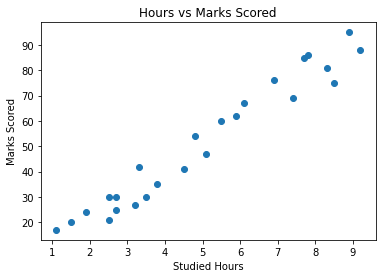

In [104]:
#visualizing the dataset using scatter plot
plt.scatter(ds['Hours'], ds['Scores'])
plt.title('Hours vs Marks Scored')
plt.xlabel('Studied Hours')
plt.ylabel('Marks Scored')
plt.show()

The above graph gives us a clear understanding about the data set, the relationship between hours studied and marks obtained.

## **Train-Test-Split**

In [105]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## **Training the Algorithm**

In [107]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
#Predicting the Test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [121]:
#Intercept is the point where the function crosses the y-axis
print('Intercept:',regressor.intercept_)
#Coefficient describes the relationship between the prdictor variable and the response
print('Coefficient:',regressor.coef_)
#Accuracy returns the mean accuracy on the given test data and labels
print('Accuracy:',regressor.score(x_train,y_train))

Intercept: 2.3708153823418883
Coefficient: [9.78856669]
Accuracy: 0.9484997422695115


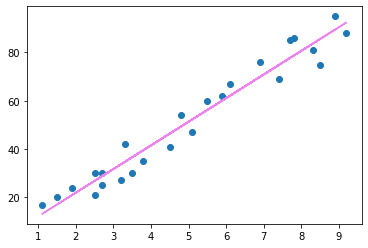

In [122]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color = 'violet');
plt.show()

## **Predicting the scores**

In [123]:
#Comparing the actual values with the predicted ones.
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


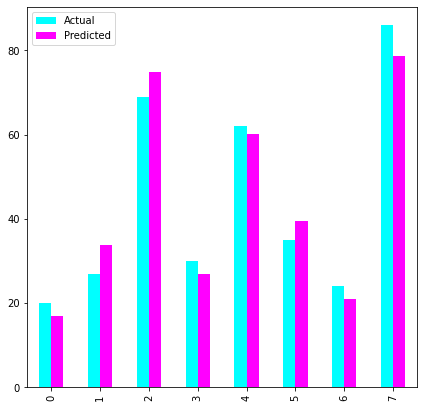

In [124]:
pred.plot(kind='bar', figsize=(7,7),colormap='cool')

## **Predicting the score if a student studied for 9.25 hours**

In [125]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


## **Evaluating the model**

In [127]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027651


In [128]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257


## **Conclusion**
We used Simple Linear Regression to predict the score of a student studying for 9.25 hrs and got the predicted value to be 92.91505723.